In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('../')

In [2]:
from SHDataset import SHDataset
from models.rulebased import RulebasedDetector
from models.hmm import HMMChangeDetector
from models.histogram import HistogramDetector
import random
import time
import numpy as np
import pickle5 as pkl
import matplotlib

In [67]:
def time_methods(bbox=(52.335, 52.36, 4.89, 4.92), num_T=1000):
    # Load the dataset
    dataset = SHDataset(noise=False)
    G1,T1,G2,T2 = dataset.read_snapshots(0, bbox=bbox)
    T1['T'] = random.sample(T1['T'], num_T)
    T2['T'] = random.sample(T2['T'], num_T)
    
    # Instantiate the map invalidation methods
    rb_det = RulebasedDetector(G1)
    hmm_det = HMMChangeDetector(G1)
    hist_det = HistogramDetector(G1, bbox)
    
    # Run each method and time them, calculating number of trajectories per second
    start = time.time()
    rb_det.forward(T2['T'])
    end = time.time()
    duration_rb = end-start

    t_per_s_rb = num_T / duration_rb
    print(f'Rulebased took {duration_rb} seconds to run, {t_per_s_rb}t/s')

    start = time.time()
    hmm_det.forward(T2['T'])
    end = time.time()
    duration_hmm = end-start

    t_per_s_hmm = num_T / duration_hmm
    print(f'HMM took {duration_hmm} seconds to run, {t_per_s_hmm}t/s')

    start = time.time()
    hist_det.forward(T2['T'])
    end = time.time()
    duration_hist = end-start

    t_per_s_hist = num_T / duration_hist
    print(f'Histogram method took {duration_hist} seconds to run, {t_per_s_hist}t/s')
    
    return duration_rb, t_per_s_rb, duration_hmm, t_per_s_hmm, duration_hist, t_per_s_hist

### Runtime analysis on different number of trajectories

In [ ]:
def calc_bigO(bbox=None):
    T_nums = np.linspace(0,3000, 11, dtype=np.int32)[1:]
    rb_tps, hmm_tps, hist_tps = [], [], []

    for num_T in T_nums:
        _,rb,_,hmm,_,hist = time_methods(bbox, num_T=num_T)
        rb_tps.append(rb)
        hmm_tps.append(hmm)
        hist_tps.append(hist)
        
    return rb_tps, hmm_tps, hist_tps

rb_tps, hmm_tps, hist_tps = calc_bigO()

import pickle5 as pkl
with open('timings.hdf5', 'w') as f:
    pkl.dump((rb_tps, hmm_tps, hist_tps), f)

Running Rule-based Change Detector: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:02<00:00, 129.07it/s]


Rulebased took 2.343097686767578 seconds to run, 128.0356349179215t/s


Map matching trajectory: 299/300: : 300it [02:47,  1.79it/s]


No matches for 3/300 trajectories
HMM took 167.33732891082764 seconds to run, 1.7927858772017746t/s


Running Histogram Change Detector: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 665.00it/s]


Histogram method took 1.1967194080352783 seconds to run, 250.6853302333643t/s


Running Rule-based Change Detector: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:04<00:00, 127.24it/s]


Rulebased took 4.732029914855957 seconds to run, 126.79547906413943t/s


Map matching trajectory: 599/600: : 600it [05:35,  1.79it/s]


No matches for 7/600 trajectories
HMM took 335.8288514614105 seconds to run, 1.7866243397165205t/s


Running Histogram Change Detector: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:00<00:00, 633.54it/s]


Histogram method took 1.7156720161437988 seconds to run, 349.71719207064984t/s


Running Rule-based Change Detector: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 900/900 [00:07<00:00, 124.82it/s]


Rulebased took 7.229335069656372 seconds to run, 124.49277718189637t/s


Map matching trajectory: 899/900: : 900it [08:46,  1.71it/s]


No matches for 19/900 trajectories
HMM took 526.4291462898254 seconds to run, 1.7096317830101777t/s


Running Histogram Change Detector: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 900/900 [00:01<00:00, 665.50it/s]


Histogram method took 2.1129746437072754 seconds to run, 425.93980135082165t/s


Running Rule-based Change Detector: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:09<00:00, 125.74it/s]


Rulebased took 9.561277151107788 seconds to run, 125.50624576978879t/s


Map matching trajectory: 1199/1200: : 1200it [11:37,  1.72it/s]


No matches for 12/1200 trajectories
HMM took 697.2509610652924 seconds to run, 1.7210445980118612t/s


Running Histogram Change Detector: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:01<00:00, 690.05it/s]


Histogram method took 2.5023512840270996 seconds to run, 479.54897765944696t/s


Running Rule-based Change Detector: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:11<00:00, 125.37it/s]


Rulebased took 11.983434915542603 seconds to run, 125.17279148856468t/s


Map matching trajectory: 1499/1500: : 1500it [14:08,  1.77it/s]


No matches for 13/1500 trajectories
HMM took 848.5951254367828 seconds to run, 1.7676274056228294t/s


Running Histogram Change Detector: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:02<00:00, 671.49it/s]


Histogram method took 3.070218563079834 seconds to run, 488.5645660663657t/s


Running Rule-based Change Detector: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1800/1800 [00:14<00:00, 126.13it/s]


Rulebased took 14.289823532104492 seconds to run, 125.96376686919872t/s


Map matching trajectory: 1799/1800: : 1800it [17:17,  1.73it/s]


No matches for 32/1800 trajectories
HMM took 1037.980689048767 seconds to run, 1.7341363081133692t/s


Running Histogram Change Detector: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1800/1800 [00:02<00:00, 688.26it/s]


Histogram method took 3.386686325073242 seconds to run, 531.4929778626819t/s


Running Rule-based Change Detector: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2100/2100 [00:16<00:00, 128.59it/s]


Rulebased took 16.350669860839844 seconds to run, 128.43510497570125t/s


Map matching trajectory: 879/2100: : 879it [08:08,  1.80it/s]

In [7]:
def calc_bigO(bbox=None):
    T_nums = np.linspace(0,3000, 11, dtype=np.int32)[7:]
    rb_tps, hmm_tps, hist_tps = [], [], []

    for num_T in T_nums:
        _,rb,_,hmm,_,hist = time_methods(bbox, num_T=num_T)
        rb_tps.append(rb)
        hmm_tps.append(hmm)
        hist_tps.append(hist)
        
    return rb_tps, hmm_tps, hist_tps

rb_tps, hmm_tps, hist_tps = calc_bigO()

import pickle5 as pkl
with open('timings.hdf5', 'w') as f:
    pkl.dump((rb_tps, hmm_tps, hist_tps), f)

Running Rule-based Change Detector: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2100/2100 [00:16<00:00, 125.97it/s]


Rulebased took 16.68752932548523 seconds to run, 125.84247548214796t/s


Map matching trajectory: 2099/2100: : 2100it [19:45,  1.77it/s]


No matches for 33/2100 trajectories
HMM took 1186.0232498645782 seconds to run, 1.7706229622731096t/s


Running Histogram Change Detector: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2100/2100 [00:03<00:00, 698.40it/s]


Histogram method took 3.7783353328704834 seconds to run, 555.8003234203632t/s


Running Rule-based Change Detector: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2400/2400 [00:18<00:00, 126.94it/s]


Rulebased took 18.92776393890381 seconds to run, 126.79786200561601t/s


Map matching trajectory: 2399/2400: : 2400it [22:27,  1.78it/s]


No matches for 28/2400 trajectories
HMM took 1347.1871190071106 seconds to run, 1.7814897174557476t/s


Running Histogram Change Detector: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2400/2400 [00:03<00:00, 683.03it/s]


Histogram method took 4.28145956993103 seconds to run, 560.5565020058478t/s


Running Rule-based Change Detector: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2700/2700 [00:21<00:00, 127.83it/s]


Rulebased took 21.141798973083496 seconds to run, 127.70909436029935t/s


Map matching trajectory: 2699/2700: : 2700it [25:36,  1.76it/s]


No matches for 43/2700 trajectories
HMM took 1536.5081419944763 seconds to run, 1.757231169953479t/s


Running Histogram Change Detector: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2700/2700 [00:03<00:00, 701.01it/s]


Histogram method took 4.625916242599487 seconds to run, 583.6681553237034t/s


Running Rule-based Change Detector: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:23<00:00, 125.78it/s]


Rulebased took 23.869268894195557 seconds to run, 125.6846203919354t/s


Map matching trajectory: 2999/3000: : 3000it [28:33,  1.75it/s]


No matches for 38/3000 trajectories
HMM took 1713.999920129776 seconds to run, 1.7502917968472567t/s


Running Histogram Change Detector: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:04<00:00, 694.58it/s]


Histogram method took 5.095978260040283 seconds to run, 588.6995287095839t/s


TypeError: write() argument must be str, not bytes

### Runtime analysis on different bounding boxes with different areas

Map (52.34281347772705, 52.35, 4.89, 4.901765053690325) has dimensions 801.81m x 799.67m, or 0.64km^2
# of edges: 111


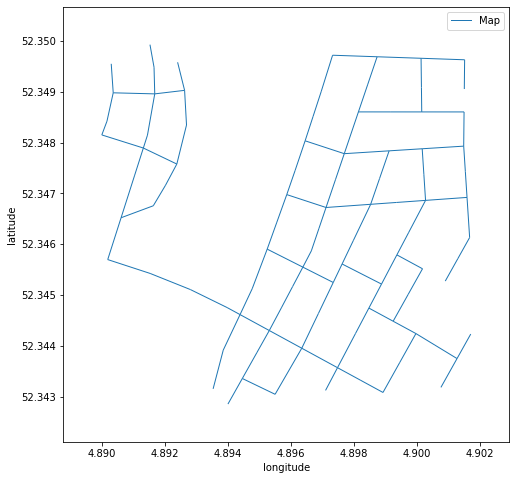

Map (52.33562695545409, 52.35, 4.89, 4.913530107380651) has dimensions 1603.89m x 1599.34m, or 2.57km^2
# of edges: 604


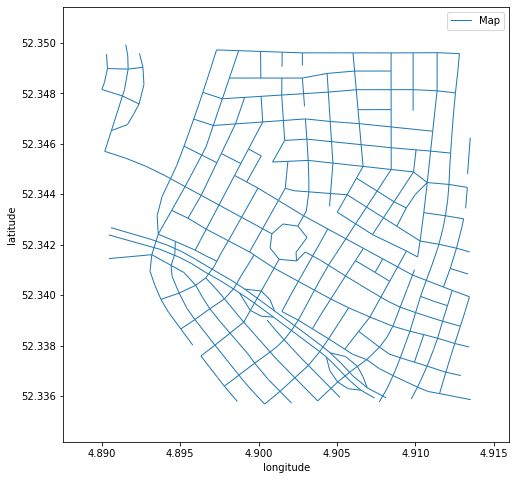

Map (52.328440433181136, 52.35, 4.89, 4.925295161070976) has dimensions 2406.22m x 2399.01m, or 5.77km^2
# of edges: 1247


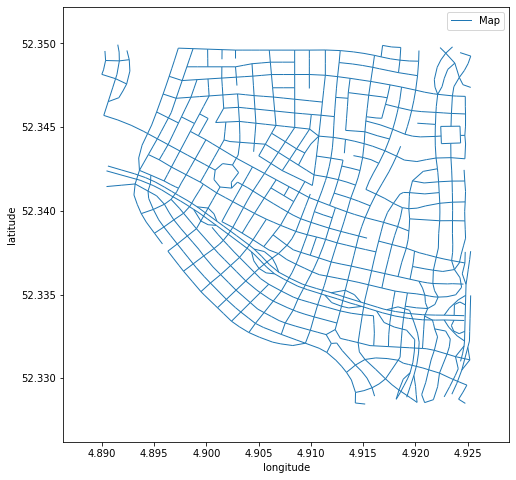

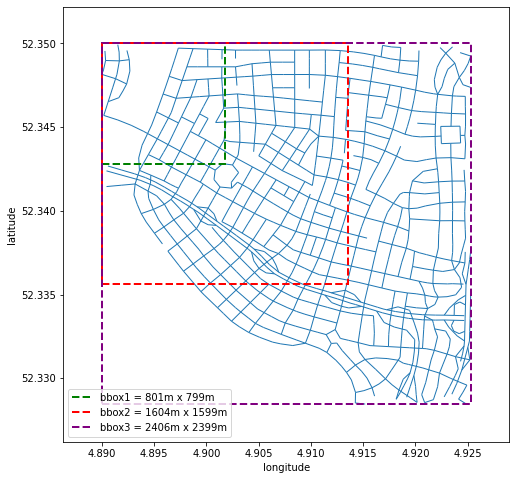

In [74]:
from utils.utils import *

def define_bboxs(ref_coord=(52.35, 4.89)):

    bbox_1_upper = cart_to_wgs84(ref_coord, 800, -800)
    bbox_2_upper = cart_to_wgs84(ref_coord, 1600, -1600)
    bbox_3_upper = cart_to_wgs84(ref_coord, 2400, -2400)

    bbox_1 = (bbox_1_upper[0], ref_coord[0], ref_coord[1], bbox_1_upper[1])
    bbox_2 = (bbox_2_upper[0], ref_coord[0], ref_coord[1], bbox_2_upper[1])
    bbox_3 = (bbox_3_upper[0], ref_coord[0], ref_coord[1], bbox_3_upper[1])
    bboxs = [bbox_1, bbox_2, bbox_3]
    
    return bboxs

def plot_bboxs_wstats(bboxs):

    for bbox in bboxs:
        lat1, lon1 = bbox[0], bbox[2]
        lat2, lon2 = bbox[0], bbox[3]
        _, _, width = geodesic.inv(lon1, lat1, lon2, lat2)

        lat1, lon1 = bbox[0], bbox[2]
        lat2, lon2 = bbox[1], bbox[2]
        _, _, height = geodesic.inv(lon1, lat1, lon2, lat2)


        dataset = SHDataset(noise=False)
        G1,T1,G2,T2 = dataset.read_snapshots(0, bbox=bbox)
        print(f'Map {bbox} has dimensions {round(width,2)}m x {round(height,2)}m, or {round((width*height)/1000000,2)}km^2')
        print(f'# of edges: {len(G2.edges)}')
        plot_graph(G2)


def plot_bboxs_combined(bboxs):
    bbox_1, bbox_2, bbox_3 = bboxs[0], bboxs[1], bboxs[2]
    
    plot_graph(G2, show_img=False)


    xy = (bbox_1[2], bbox_1[0])
    width = (bbox_1[3] - bbox_1[2])
    height = (bbox_1[1] - bbox_1[0])
    rect_bbox1 = matplotlib.patches.Rectangle(xy, width, height, linewidth=2, linestyle='--', edgecolor='green', facecolor='none')


    xy = (bbox_2[2], bbox_2[0])
    width = (bbox_2[3] - bbox_2[2])
    height = (bbox_2[1] - bbox_2[0])
    rect_bbox2 = matplotlib.patches.Rectangle(xy, width, height, linewidth=2, linestyle='--', edgecolor='red', facecolor='none')

    xy = (bbox_3[2], bbox_3[0])
    width = (bbox_3[3] - bbox_3[2])
    height = (bbox_3[1] - bbox_3[0])
    rect_bbox3 = matplotlib.patches.Rectangle(xy, width, height, linewidth=2, linestyle='--', edgecolor='purple', facecolor='none')


    plt.gca().add_patch(rect_bbox1)
    plt.gca().add_patch(rect_bbox2)
    plt.gca().add_patch(rect_bbox3)

    bbox1_line = mlines.Line2D([], [], color='green', linestyle='--',
                          markersize=1, linewidth=2, label='bbox1 = 801m x 799m')
    bbox2_line = mlines.Line2D([], [], color='red', linestyle='--',
                          markersize=1, linewidth=2, label='bbox2 = 1604m x 1599m')
    bbox3_line = mlines.Line2D([], [], color='purple', linestyle='--',
                          markersize=1, linewidth=2, label='bbox3 = 2406m x 2399m')

    plt.legend(handles=[bbox1_line, bbox2_line, bbox3_line])
    plt.show()

bboxs = define_bboxs()
plot_bboxs_wstats(bboxs)
plot_bboxs_combined(bboxs)

In [75]:
def time_bboxs(bboxs, num_T=1000):
    for i, bbox in enumerate(bboxs):
        print(f'Results for bbox {i}: {bbox}')
        time_methods(bbox, num_T)
        
        
time_bboxs(bboxs)

Results for bbox 0: (52.34281347772705, 52.35, 4.89, 4.901765053690325)


Running Rule-based Change Detector: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 396.86it/s]


Rulebased took 2.5241692066192627 seconds to run, 396.16995460432963t/s


Map matching trajectory: 999/1000: : 1000it [01:48,  9.20it/s]


No matches for 232/1000 trajectories
HMM took 108.69383716583252 seconds to run, 9.200153624849175t/s


Running Histogram Change Detector: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2146.36it/s]


Histogram method took 0.4821650981903076 seconds to run, 2073.978402321659t/s
Results for bbox 1: (52.33562695545409, 52.35, 4.89, 4.913530107380651)


Running Rule-based Change Detector: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 245.23it/s]


Rulebased took 4.08302116394043 seconds to run, 244.91668297769073t/s


Map matching trajectory: 999/1000: : 1000it [05:01,  3.32it/s]


No matches for 115/1000 trajectories
HMM took 301.2230987548828 seconds to run, 3.3197985285110545t/s


Running Histogram Change Detector: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1449.43it/s]


Histogram method took 0.7609128952026367 seconds to run, 1314.2108726304245t/s
Results for bbox 2: (52.328440433181136, 52.35, 4.89, 4.925295161070976)


Running Rule-based Change Detector: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 196.41it/s]


Rulebased took 5.095977544784546 seconds to run, 196.23320377921314t/s


Map matching trajectory: 999/1000: : 1000it [06:20,  2.63it/s]


No matches for 65/1000 trajectories
HMM took 380.64558815956116 seconds to run, 2.6271156979253214t/s


Running Histogram Change Detector: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1214.31it/s]


Histogram method took 0.9637241363525391 seconds to run, 1037.6413356053904t/s
